In [1]:
import cv2.aruco as aruco
import pickle

In [2]:
import sys
import torch
sys.path.insert(0,r"D:\git\AdversarialRendering\utils")
import tqdm
from classfier import *
orig_clases = torch.tensor([817, 705, 609, 586, 436, 627, 468, 621, 803, 407, 408, 751, 717,866])

import torchvision
tt = torchvision.transforms.ToTensor()

In [3]:
# load matrix and distortion from file
cameraMatrix, dist = pickle.load(open("calibration.pkl", "rb"))

In [4]:
import cv2
import cv2.aruco as aruco
import numpy as np

# Define parameters for ArUco marker detection
aruco_dict_type = cv2.aruco.DICT_6X6_250 # Change dictionary type if needed
marker_length = 0.05  # Marker length in meters (adjust as needed)
aruco_dict = cv2.aruco.getPredefinedDictionary(aruco_dict_type)

marker_id = 42
marker_size = 500  # Size in pixels
marker_image = cv2.aruco.generateImageMarker(aruco_dict, marker_id, marker_size)


In [5]:
cv2.imwrite("aruco.png", marker_image)

True

In [6]:
import cv2
import matplotlib.pyplot as plt

camera_index = 0
cap = cv2.VideoCapture(camera_index, cv2.CAP_DSHOW) # this is the magic!


In [7]:
# img = cv2.imread(r"D:\git\wall_alignment\colorful_pattern.jpg")
img = cv2.imread(r"D:\git\AdversarialRendering\patches\13_05_pred.png")
orig_img_corners = np.array([[0, 0], [img.shape[1], 0], [img.shape[1], img.shape[0]], [0, img.shape[0]]], dtype=np.float32)


In [11]:
import time
# add white border to marker image
cv2.destroyAllWindows()

border_size = 2

marker_image_bord = cv2.copyMakeBorder(marker_image, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT, value=(255, 255, 255))
cv2.imshow("a",cv2.resize(marker_image_bord,(600,300)))
cv2.waitKey(1)
time.sleep(10)
# cv2.destroyAllWindows()

In [ ]:
# cv2.imshow("a",cv2.resize(img,(600,300)))
# cv2.waitKey(1)
# time.sleep(10)


In [ ]:
frames = []
frame_idx = 0 
while True:
    ret, frame = cap.read()
    frame_idx += 1
    if not ret:
        print("Failed to capture frame")
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Initialize ArUco dictionary and detector parameters
    aruco_dict = aruco.getPredefinedDictionary(aruco_dict_type)
    parameters = aruco.DetectorParameters()

    # Detect ArUco markers
    detector = aruco.ArucoDetector(aruco_dict, parameters)
    corners, ids, _ = detector.detectMarkers(gray)

    if ids is not None:
        # Draw detected markers

        if frame_idx % 1 == 0:
            frames.append(cv2.cvtColor(frame.copy(), cv2.COLOR_BGR2RGB))

        frame = aruco.drawDetectedMarkers(frame, corners, ids)


        dst_pts = corners[0][0]
        H, _ = cv2.findHomography(orig_img_corners, dst_pts, cv2.RANSAC)
        warp_img = cv2.warpPerspective(img, H, (frame.shape[1], frame.shape[0]))
        warp_mask = cv2.warpPerspective(img*0+1, H, (frame.shape[1], frame.shape[0]))
        sum_tensor = frame * (1 - warp_mask) + warp_img * warp_mask

        
        pred =resnet_predict(tt(sum_tensor).cuda().unsqueeze(0))

        cv2.imshow("ArUco Pose Estimation", frame)
        # Overlay the warped image on the original frame
            # cv2.imshow("Warped Image", warp_img)
            # cv2.addWeighted(frame, 0.5, warp_img, 0.5, 0, frame)
            # add text with background to sum_tensor
    
        cv2.putText(sum_tensor, str(pred), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.imshow("Overlayed Image", sum_tensor)
            
    # Display the original image with the warped image overlayed
    


    # Exit loop on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [41]:
warp_img .shape

(480, 640)

In [31]:
preds = []
while True:
    ret, frame = cap.read()
    frame_idx += 1
    if not ret:
        print("Failed to capture frame")
        break
    pred =resnet_predict(tt(frame).cuda().unsqueeze(0))
    cv2.putText(frame, str(pred), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    cv2.imshow("frame", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    preds.append(pred)

KeyboardInterrupt: 

In [41]:
import pandas as pd

df = pd.DataFrame([p.split(':') for p in preds], columns=['class', 'prob'])

In [43]:
import plotly.express as px

# hist class 
fig = px.histogram(df, x="class")
fig.show()

In [55]:
len(frames)

1512

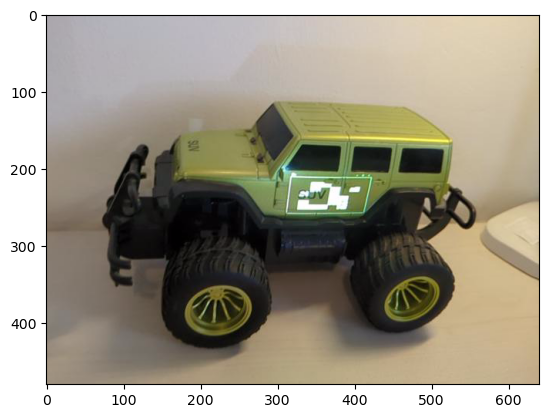

In [56]:
plt.imshow(frames[203])

In [71]:
ret, frame = cap.read()
f = cv2.cvtColor(frame.copy(), cv2.COLOR_BGR2RGB)
cv2.imwrite(r"D:\git\AdversarialRendering\ref.png", f)

True

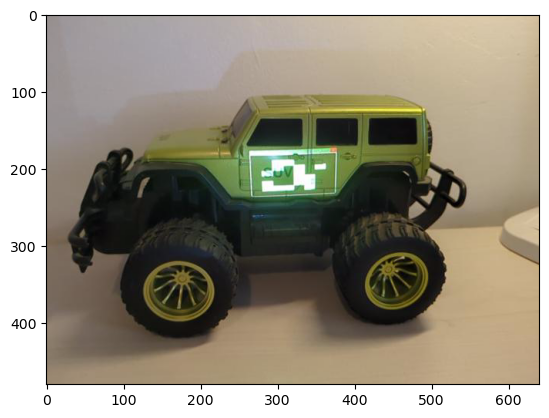

In [72]:
plt.imshow(f)

In [100]:
pred_ref_img = cv2.imread(r"D:\git\AdversarialRendering\patches\10_05_pred.png")
# pred_ref_img = cv2.cvtColor(pred_ref_img, cv2.COLOR_BGR2RGB)


In [108]:
cv2.imshow("a", pred_ref_img)
cv2.waitKey(1)
time.sleep(1)

In [109]:
for i in range(10):
    ret, frame = cap.read()
frame = cv2.cvtColor(frame.copy(), cv2.COLOR_BGR2RGB)

frame_t = tt(frame)

In [110]:
resnet_predict(frame_t.unsqueeze(0).cuda())

'jeep: 0.124%'

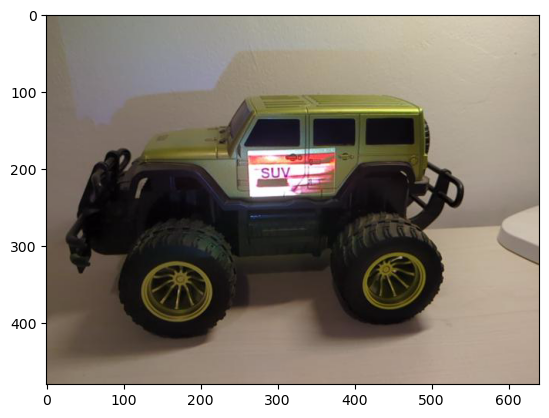

In [111]:
plt.imshow(frame_t.permute(1,2,0).numpy())

## Clean data

In [42]:

aruco_dict = aruco.getPredefinedDictionary(aruco_dict_type)
parameters = aruco.DetectorParameters()

# Detect ArUco markers
detector = aruco.ArucoDetector(aruco_dict, parameters)

In [43]:
valid_frames = []
for frame in tqdm.tqdm(frames):
    with torch.no_grad():
        p = resnet_predict_raw(tt(frame).cuda().unsqueeze(0)).argmax(-1).cpu()

    if p not in orig_clases:
        continue

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Initialize ArUco dictionary and detector parameters
    corners, ids, _ = detector.detectMarkers(gray)

    if ids is None:
        continue
        # Draw detected markers
        # frame = aruco.drawDetectedMarkers(frame, corners, ids)
    valid_frames.append(frame)

 25%|██▍       | 369/1503 [01:46<05:28,  3.45it/s]


KeyboardInterrupt: 

In [ ]:
len(valid_frames)

1316

In [57]:
import os
valid_frames = frames

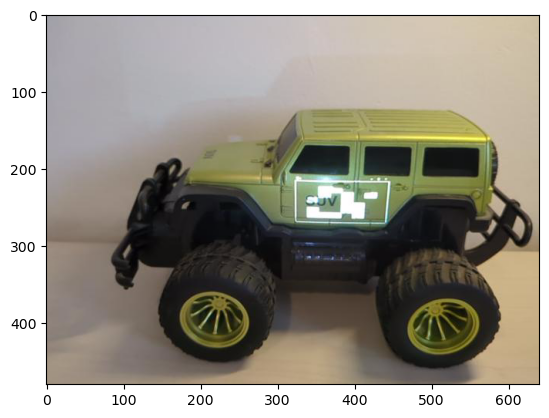

In [60]:
plt.imshow(frames[10])

In [58]:
os.makedirs(r"D:\git\AdversarialRendering\multiview\valid_frames3", exist_ok=True)
for i, frame in enumerate(valid_frames):
    cv2.imwrite(os.path.join(r"D:\git\AdversarialRendering\multiview\valid_frames3", f"{i}.png"), frame)

# pose est

In [13]:
corners

(array([[[498., 296.],
         [424., 288.],
         [421., 216.],
         [496., 221.]]], dtype=float32),)

In [14]:
def my_estimatePoseSingleMarkers(corners, marker_size, mtx, distortion):
    '''
    This will estimate the rvec and tvec for each of the marker corners detected by:
       corners, ids, rejectedImgPoints = detector.detectMarkers(image)
    corners - is an array of detected corners for each detected marker in the image
    marker_size - is the size of the detected markers
    mtx - is the camera matrix
    distortion - is the camera distortion matrix
    RETURN list of rvecs, tvecs, and trash (so that it corresponds to the old estimatePoseSingleMarkers())
    '''
    marker_points = np.array([[-marker_size / 2, marker_size / 2, 0],
                              [marker_size / 2, marker_size / 2, 0],
                              [marker_size / 2, -marker_size / 2, 0],
                              [-marker_size / 2, -marker_size / 2, 0]], dtype=np.float32)
    trash = []
    rvecs = []
    tvecs = []
    
    for c in corners:
        nada, R, t = cv2.solvePnP(marker_points, c, mtx, distortion, False, cv2.SOLVEPNP_IPPE_SQUARE)
        rvecs.append(R)
        tvecs.append(t)
        trash.append(nada)
    return rvecs, tvecs, trash

rvec, tvec, _ = my_estimatePoseSingleMarkers(corners[0], marker_length, cameraMatrix, dist)


In [ ]:
# rotM_cam = cv2.Rodrigues(rvec[0])[0]

# # calculate camera position (= translation), in mm from 0,0,0 point
# cameraPosition = -np.matrix(rotM_cam).T * np.matrix(tvec[0])

# # 3x3 Identity matrix
# I = np.identity(3)

# # [I|-C]
# I1_extended = np.hstack((I,-cameraPosition))

# # P = K*R*I
# P_cam = cameraMatrix.dot(rotM_cam).dot(I1_extended)

In [16]:
rvec

[array([[ 0.00398692],
        [-2.64807888],
        [-0.46102897]])]

In [15]:
tvec

[array([[0.08856804],
        [0.00810884],
        [0.70543397]])]